In [4]:
import networkx as nx

G = nx.Graph()
G.add_node(1)
G.add_edge(1,2)
print(G)


Graph with 2 nodes and 1 edges


In [321]:
import pandas as pd
import numpy as np
pd.set_option("display.max_colwidth", None)


df = pd.read_json("ratgeber_pages_url.json")

## Matrix build
To build the matrix, we need to list every single linked URL in the X-axis. The individual pages that were scraped are listed in the Y-axis.

In the first step, we need the URL of each scraped page in the form of a list. These can be found in the "url" column.

In the next step, we extract each individual URL from the column of URLs linked on the page, if it is not already in the all_linked_page_urls list, it is added.

In [322]:
all_scraped_page_urls = df.url.tolist()
print(all_scraped_page_urls)

['https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber', 'https://www.mobiliar.ch/versicherungen-und-vorsorge/angebote-fuer-unternehmen/ratgeber/was-tun-bei-einem-cyberangriff', 'https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber/so-wird-ihr-passwort-sicher', 'https://www.mobiliar.ch/versicherungen-und-vorsorge/fahrzeuge-und-reisen/ratgeber/welche-versicherungen-brauche-ich-fuers-motorradfahren', 'https://www.mobiliar.ch/versicherungen-und-vorsorge/services/digitaler-rechtsratgeber', 'https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber/vor-dem-umzug-auch-an-die-versicherung-gedacht', 'https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit/ratgeber/schuetzen-sie-ihr-kind-mit-den-richtigen-kinderversicherungen', 'https://www.mobiliar.ch/versicherungen-und-vorsorge/angebote-fuer-unternehmen/ratgeber', 'https://www.mobiliar.ch/versicherungen-und-vorsorge/fahrzeuge-und-reisen/ratgeber

In [323]:
def get_all_page_urls_of_linkedpages_column(pandas_dataframe, column_of_lists_with_linked_pages="linkedpages"):
    all_linked_page_urls = []
    for i in pandas_dataframe.index:
        list_of_linked_pages_per_url = pandas_dataframe.loc[i, column_of_lists_with_linked_pages]
        for linkedpage in list_of_linked_pages_per_url:
            if linkedpage not in all_linked_page_urls:
                all_linked_page_urls.append(linkedpage)
    return all_linked_page_urls

all_linked_page_urls = get_all_page_urls_of_linkedpages_column(df)
len(all_linked_page_urls)

568

## Fill Matrix

Next, we want to fill the matrix. If the respective page (row) in your content links to the other website as an X-axis attribute, enter True, otherwise False. 

In [311]:
# To figure out how to make it work, I've used this simple Test
liste_mit_allen_linked_urls = ["A", "B", "C", "D", "E", "F", "G", "H"]
page_url_1 = ["A", "H", "D"]
page_url_2 = ["D", "F"]
page_url_3 = ["C", "E", "F", "H"]
liste_aller_page_urls = [page_url_1, page_url_2, page_url_3]

test_matrix = pd.DataFrame(columns=liste_mit_allen_linked_urls)

for page_url in liste_aller_page_urls:
    ist_in_liste_mit_allen_linked_urls = [(buchstabe in page_url) for buchstabe in liste_mit_allen_linked_urls]
    new_row = dict(zip(matrix.columns, ist_in_liste_mit_allen_linked_urls))      
    test_matrix = pd.concat([test_matrix, pd.DataFrame([new_row])], ignore_index=True)
test_matrix = test_matrix.assign(page_url=['page_url_1', 'page_url_2', 'page_url_3'])
test_matrix

,A,B,C,D,E,F,G,H,page_url
0,True,False,False,True,False,False,False,True,page_url_1
1,False,False,False,True,False,True,False,False,page_url_2
2,False,False,True,False,True,True,False,True,page_url_3


In [324]:
if all_linked_urls[0] != "page_url":
    all_linked_urls.insert(0, "page_url")

assert all_linked_urls[0] == "page_url", "first Element must be 'page_url'."
assert all_linked_urls[1].startswith("https://"), "second Element must start with 'https://...'." 

matrix = pd.DataFrame(columns=all_linked_urls)

for page_url in all_scraped_page_urls:
    is_in_list_of_all_linked_urls = [(link in page_url) for link in all_linked_urls]
    is_in_list_of_all_linked_urls[0] = page_url
    new_row = dict(zip(matrix.columns, is_in_list_of_all_linked_urls))      
    matrix = pd.concat([matrix, pd.DataFrame([new_row])], ignore_index=True)

matrix

,page_url,https://www.mobiliar.ch/,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber/gestoerte-idylle,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber/wertrichtige-versicherungssumme,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber/hauskauf-ohne-heirat,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber/drohnen-und-multicopter-versichern,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber/so-versichern-sich-junge-erwachsene-richtig,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber/schutz-vor-ueberschwemmungen,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber/hausrat-vs-haushaltsversicherung,...,https://www.mobiliar.ch/versicherungen-und-vorsorge/angebote-fuer-unternehmen/ratgeber/cyber-sicherheit-schuetzen-sie-ihr-unternehmen-vor-hackern#alle,https://www.mobiliar.ch/versicherungen-und-vorsorge/angebote-fuer-unternehmen/ratgeber/cyber-sicherheit-schuetzen-sie-ihr-unternehmen-vor-hackern#rechte,https://www.mobiliar.ch/versicherungen-und-vorsorge/angebote-fuer-unternehmen/ratgeber/cyber-sicherheit-schuetzen-sie-ihr-unternehmen-vor-hackern#sicher,https://www.mobiliar.ch/versicherungen-und-vorsorge/angebote-fuer-unternehmen/ratgeber/cyber-sicherheit-schuetzen-sie-ihr-unternehmen-vor-hackern#richtig,https://www.mobiliar.ch/versicherungen-und-vorsorge/angebote-fuer-unternehmen/ratgeber/cyber-sicherheit-schuetzen-sie-ihr-unternehmen-vor-hackern#risiken,http://www.facebook.com/sharer.php?u=https%3A//die.mobiliar.ch/dkn&t=Leben%20im%20Konkubinat%3A%20das%20sollten%20Paare%20wissen%20,http://twitter.com/share?url=https%3A//die.mobiliar.ch/dkh&text=Leben%20im%20Konkubinat%3A%20das%20sollten%20Paare%20wissen%20,http://www.linkedin.com/shareArticle?mini=true&url=https%3A//die.mobiliar.ch/dk7&title=Leben%20im%20Konkubinat%3A%20das%20sollten%20Paare%20wissen%20&summary=&source=die%20Mobiliar,https://www.ch.ch/de/adoption-stiefkind/,https://www.mobiliar.ch/versicherungen-und-vorsorge/angebote-fuer-unternehmen/services-fuer-unternehmen/foundera-ihr-partner-auf-dem-weg-in-die-selbststaendigkeit
0,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,https://www.mobiliar.ch/versicherungen-und-vorsorge/angebote-fuer-unternehmen/ratgeber/was-tun-bei-einem-cyberangriff,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber/so-wird-ihr-passwort-sicher,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,https://www.mobiliar.ch/versicherungen-und-vorsorge/fahrzeuge-und-reisen/ratgeber/welche-versicherungen-brauche-ich-fuers-motorradfahren,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,https://www.mobiliar.ch/versicherungen-und-vorsorge/services/digitaler-rechtsratgeber,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit/ratgeber/leben-im-konkubinat-das-sollten-paare-wissen,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
144,https://www.mobiliar.ch/versicherungen-und-vorsorge/fahrzeuge-und-reisen/ratgeber/glasbruch-am-auto-rechte-und-pflichten,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Fal

In [358]:
def get_connection_matrix(pandas_dataframe, list_of_all_linked_page_urls):
    assert list_of_all_linked_page_urls[0].startswith("https://"), "first Element must start with 'https://...'."  
    list_of_all_linked_page_urls.insert(0, "page_url")

    matrix = pd.DataFrame(columns=list_of_all_linked_page_urls)

    all_scraped_page_urls = pandas_dataframe.url.tolist()
    
    for scraped_page_url in all_scraped_page_urls:
        is_in_list_of_all_linked_urls = [(link in page_url) for link in list_of_all_linked_page_urls]
        is_in_list_of_all_linked_urls[0] = page_url
        new_row = dict(zip(matrix.columns, is_in_list_of_all_linked_urls))      
        matrix = pd.concat([matrix, pd.DataFrame([new_row])], ignore_index=True)
    return matrix

df = pd.read_json("ratgeber_pages_url.json")
get_connection_matrix(pandas_dataframe=df, list_of_all_linked_page_urls=get_all_page_urls_of_linkedpages_column(df))

,page_url,https://www.mobiliar.ch/,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber/gestoerte-idylle,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber/wertrichtige-versicherungssumme,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber/hauskauf-ohne-heirat,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber/drohnen-und-multicopter-versichern,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber/so-versichern-sich-junge-erwachsene-richtig,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber/schutz-vor-ueberschwemmungen,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber/hausrat-vs-haushaltsversicherung,...,https://www.mobiliar.ch/versicherungen-und-vorsorge/angebote-fuer-unternehmen/ratgeber/cyber-sicherheit-schuetzen-sie-ihr-unternehmen-vor-hackern#alle,https://www.mobiliar.ch/versicherungen-und-vorsorge/angebote-fuer-unternehmen/ratgeber/cyber-sicherheit-schuetzen-sie-ihr-unternehmen-vor-hackern#rechte,https://www.mobiliar.ch/versicherungen-und-vorsorge/angebote-fuer-unternehmen/ratgeber/cyber-sicherheit-schuetzen-sie-ihr-unternehmen-vor-hackern#sicher,https://www.mobiliar.ch/versicherungen-und-vorsorge/angebote-fuer-unternehmen/ratgeber/cyber-sicherheit-schuetzen-sie-ihr-unternehmen-vor-hackern#richtig,https://www.mobiliar.ch/versicherungen-und-vorsorge/angebote-fuer-unternehmen/ratgeber/cyber-sicherheit-schuetzen-sie-ihr-unternehmen-vor-hackern#risiken,http://www.facebook.com/sharer.php?u=https%3A//die.mobiliar.ch/dkn&t=Leben%20im%20Konkubinat%3A%20das%20sollten%20Paare%20wissen%20,http://twitter.com/share?url=https%3A//die.mobiliar.ch/dkh&text=Leben%20im%20Konkubinat%3A%20das%20sollten%20Paare%20wissen%20,http://www.linkedin.com/shareArticle?mini=true&url=https%3A//die.mobiliar.ch/dk7&title=Leben%20im%20Konkubinat%3A%20das%20sollten%20Paare%20wissen%20&summary=&source=die%20Mobiliar,https://www.ch.ch/de/adoption-stiefkind/,https://www.mobiliar.ch/versicherungen-und-vorsorge/angebote-fuer-unternehmen/services-fuer-unternehmen/foundera-ihr-partner-auf-dem-weg-in-die-selbststaendigkeit
0,https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit/ratgeber/budgetplanung/budgetrechner-fuer-privatpersonen,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit/ratgeber/budgetplanung/budgetrechner-fuer-privatpersonen,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit/ratgeber/budgetplanung/budgetrechner-fuer-privatpersonen,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit/ratgeber/budgetplanung/budgetrechner-fuer-privatpersonen,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit/ratgeber/budgetplanung/budgetrechner-fuer-privatpersonen,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit/ratgeber/budgetplanung/budgetrechner-fuer-privatpersonen,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
144,https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit/ratgeber/budgetplanu

# Graph

In [313]:
test_matrix

,A,B,C,D,E,F,G,H,page_url
0,True,False,False,True,False,False,False,True,page_url_1
1,False,False,False,True,False,True,False,False,page_url_2
2,False,False,True,False,True,True,False,True,page_url_3


In [374]:
G = nx.DiGraph()

G.add_nodes_from(test_matrix['page_url'])

for idx, row in test_matrix.iterrows():
    start_node = row["page_url"]
    for column in test_matrix.columns:
        if test_matrix.loc[idx,column] == True:
            end_node = column
            G.add_edge(start_node, end_node)
print(G.edges)
print(G.nodes)

[('page_url_1', 'A'), ('page_url_1', 'D'), ('page_url_1', 'H'), ('page_url_2', 'D'), ('page_url_2', 'F'), ('page_url_3', 'C'), ('page_url_3', 'E'), ('page_url_3', 'F'), ('page_url_3', 'H')]
['page_url_1', 'page_url_2', 'page_url_3', 'A', 'D', 'H', 'F', 'C', 'E']


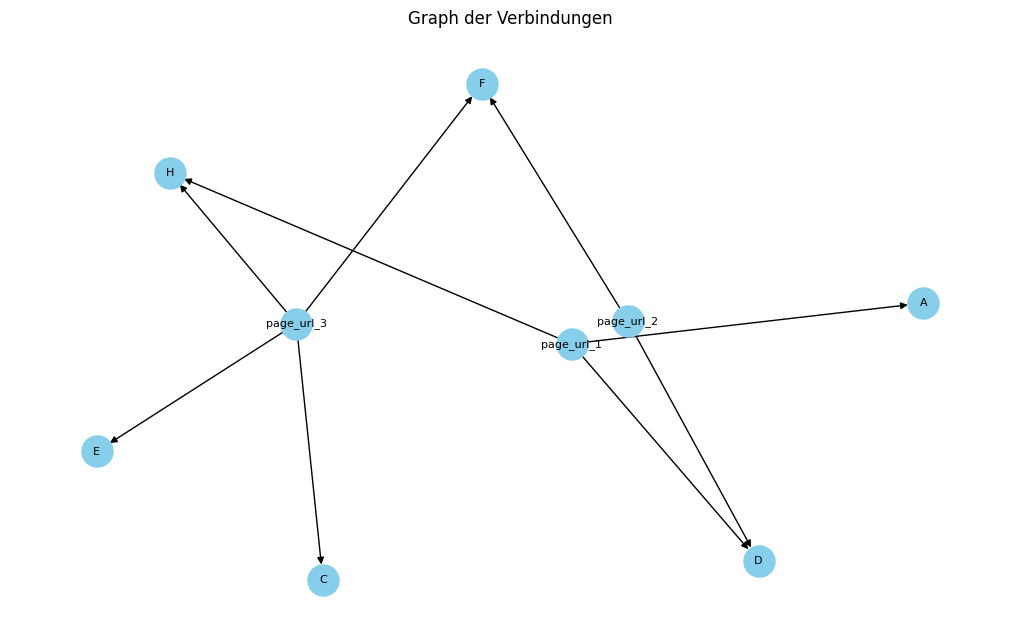

In [370]:
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=500, font_size=8)
plt.title('Graph der Verbindungen')
plt.show()


In [364]:
matrix = get_connection_matrix(pandas_dataframe=df, list_of_all_linked_page_urls=get_all_page_urls_of_linkedpages_column(df))
matrix

,page_url,https://www.mobiliar.ch/,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber/gestoerte-idylle,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber/wertrichtige-versicherungssumme,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber/hauskauf-ohne-heirat,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber/drohnen-und-multicopter-versichern,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber/so-versichern-sich-junge-erwachsene-richtig,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber/schutz-vor-ueberschwemmungen,https://www.mobiliar.ch/versicherungen-und-vorsorge/wohnen-und-eigentum/ratgeber/hausrat-vs-haushaltsversicherung,...,https://www.mobiliar.ch/versicherungen-und-vorsorge/angebote-fuer-unternehmen/ratgeber/cyber-sicherheit-schuetzen-sie-ihr-unternehmen-vor-hackern#alle,https://www.mobiliar.ch/versicherungen-und-vorsorge/angebote-fuer-unternehmen/ratgeber/cyber-sicherheit-schuetzen-sie-ihr-unternehmen-vor-hackern#rechte,https://www.mobiliar.ch/versicherungen-und-vorsorge/angebote-fuer-unternehmen/ratgeber/cyber-sicherheit-schuetzen-sie-ihr-unternehmen-vor-hackern#sicher,https://www.mobiliar.ch/versicherungen-und-vorsorge/angebote-fuer-unternehmen/ratgeber/cyber-sicherheit-schuetzen-sie-ihr-unternehmen-vor-hackern#richtig,https://www.mobiliar.ch/versicherungen-und-vorsorge/angebote-fuer-unternehmen/ratgeber/cyber-sicherheit-schuetzen-sie-ihr-unternehmen-vor-hackern#risiken,http://www.facebook.com/sharer.php?u=https%3A//die.mobiliar.ch/dkn&t=Leben%20im%20Konkubinat%3A%20das%20sollten%20Paare%20wissen%20,http://twitter.com/share?url=https%3A//die.mobiliar.ch/dkh&text=Leben%20im%20Konkubinat%3A%20das%20sollten%20Paare%20wissen%20,http://www.linkedin.com/shareArticle?mini=true&url=https%3A//die.mobiliar.ch/dk7&title=Leben%20im%20Konkubinat%3A%20das%20sollten%20Paare%20wissen%20&summary=&source=die%20Mobiliar,https://www.ch.ch/de/adoption-stiefkind/,https://www.mobiliar.ch/versicherungen-und-vorsorge/angebote-fuer-unternehmen/services-fuer-unternehmen/foundera-ihr-partner-auf-dem-weg-in-die-selbststaendigkeit
0,https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit/ratgeber/budgetplanung/budgetrechner-fuer-privatpersonen,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit/ratgeber/budgetplanung/budgetrechner-fuer-privatpersonen,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit/ratgeber/budgetplanung/budgetrechner-fuer-privatpersonen,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit/ratgeber/budgetplanung/budgetrechner-fuer-privatpersonen,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit/ratgeber/budgetplanung/budgetrechner-fuer-privatpersonen,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit/ratgeber/budgetplanung/budgetrechner-fuer-privatpersonen,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
144,https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit/ratgeber/budgetplanu

In [372]:

G = nx.DiGraph()

G.add_nodes_from(matrix['page_url'])

for idx, row in matrix.iterrows():
    start_node = row["page_url"]
    for column in matrix.columns:
        if matrix.loc[idx,column] == True:
            print(idx,column)
            end_node = column
            G.add_edge(start_node, end_node)
print(G.edges)
print(G.nodes)

0 https://www.mobiliar.ch/
0 https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit
0 https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit/ratgeber
0 https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit/ratgeber/budgetplanung
0 https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit/ratgeber/budgetplanung/budgetrechner-fuer-privatpersonen
1 https://www.mobiliar.ch/
1 https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit
1 https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit/ratgeber
1 https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit/ratgeber/budgetplanung
1 https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit/ratgeber/budgetplanung/budgetrechner-fuer-privatpersonen
2 https://www.mobiliar.ch/
2 https://www.mobiliar.ch/versicherungen-und-vorsorge/vorsorge-und-gesundheit
2 https://www.mobiliar.ch/versicherunge

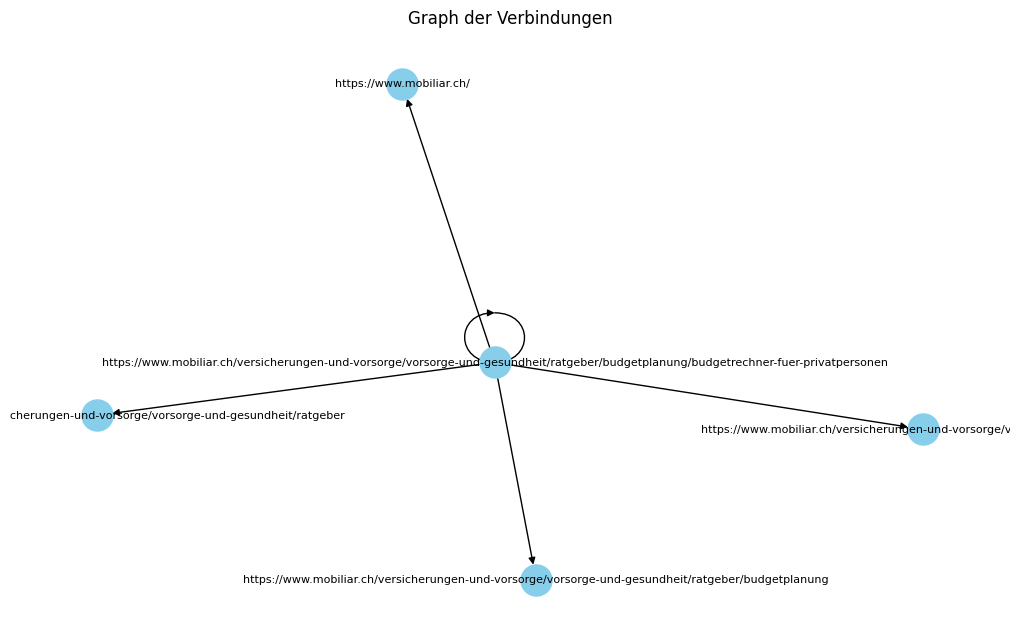

In [368]:
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=500, font_size=8)
plt.title('Graph der Verbindungen')
plt.show()
